In [47]:
import pandas as pd
import matplotlib as plt
import yfinance as yf


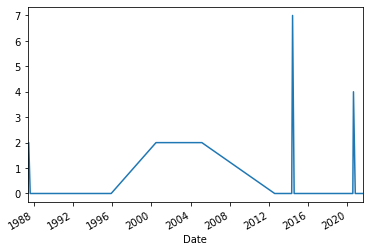

In [48]:
aapl = yf.Ticker('AAPL')
aapl.actions['Stock Splits'].plot()

In [49]:
aapl.actions.head()

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0


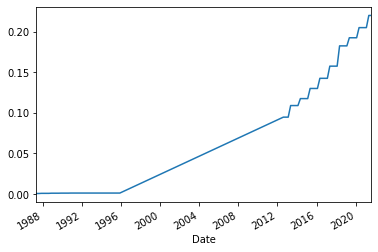

In [50]:
aapl.dividends.plot()

In [51]:
!pip3 install altair

In [52]:
import altair as alt

In [53]:
def get_data(days, tickers):
    df = pd.DataFrame()
    for company in tickers.keys():
        tkr = yf.Ticker(tickers[company])
        hist = tkr.history(period=f'{days}d')
        hist.index = hist.index.strftime('%d %B %Y')
        hist = hist[['Close']]
        hist.columns = [company]
        hist = hist.T
        hist.index.name = 'Name'
        df = pd.concat([df, hist])
    return df

In [54]:
days = 20
tickers = {
    'apple': 'AAPL',
    'facebook': 'FB',
    'google': 'GOOGL',
    'microsoft': 'MSFT',
    'netflix': 'NFLX',
    'amazon': 'AMZN'
}

df = get_data(days, tickers)

In [55]:
companies = ['apple', 'facebook']
data = df.loc[companies]
data

,11 August 2021,12 August 2021,13 August 2021,16 August 2021,17 August 2021,18 August 2021,19 August 2021,20 August 2021,23 August 2021,24 August 2021,25 August 2021,26 August 2021,27 August 2021,30 August 2021,31 August 2021,01 September 2021,02 September 2021,03 September 2021,07 September 2021,08 September 2021
Name,,,,,,,,,,,,,,,,,,,,
apple,145.860001,148.889999,149.100006,151.119995,150.190002,146.360001,146.699997,148.190002,149.710007,149.619995,148.360001,147.539993,148.600006,153.119995,151.830002,152.509995,153.649994,154.300003,156.690002,155.110001
facebook,359.959991,362.649994,363.179993,366.559998,358.450012,355.450012,355.119995,359.369995,363.350006,365.510010,368.390015,364.380005,372.630005,380.660004,379.380005,382.049988,375.279999,376.260010,382.179993,377.570007


In [56]:
data.sort_index()

,11 August 2021,12 August 2021,13 August 2021,16 August 2021,17 August 2021,18 August 2021,19 August 2021,20 August 2021,23 August 2021,24 August 2021,25 August 2021,26 August 2021,27 August 2021,30 August 2021,31 August 2021,01 September 2021,02 September 2021,03 September 2021,07 September 2021,08 September 2021
Name,,,,,,,,,,,,,,,,,,,,
apple,145.860001,148.889999,149.100006,151.119995,150.190002,146.360001,146.699997,148.190002,149.710007,149.619995,148.360001,147.539993,148.600006,153.119995,151.830002,152.509995,153.649994,154.300003,156.690002,155.110001
facebook,359.959991,362.649994,363.179993,366.559998,358.450012,355.450012,355.119995,359.369995,363.350006,365.510010,368.390015,364.380005,372.630005,380.660004,379.380005,382.049988,375.279999,376.260010,382.179993,377.570007


In [57]:
data = data.T.reset_index()
data

Name,index,apple,facebook
0,11 August 2021,145.860001,359.959991
1,12 August 2021,148.889999,362.649994
2,13 August 2021,149.100006,363.179993
3,16 August 2021,151.119995,366.559998
4,17 August 2021,150.190002,358.450012
5,18 August 2021,146.360001,355.450012
6,19 August 2021,146.699997,355.119995
7,20 August 2021,148.190002,359.369995
8,23 August 2021,149.710007,363.350006
9,24 August 2021,149.619995,365.510010


In [58]:
data = pd.melt(data, id_vars=['index']).rename(
    columns={'value':'Stock Prices(USD)',
             'index':'Date',
             }
)
data

,Date,Name,Stock Prices(USD)
0,11 August 2021,apple,145.860001
1,12 August 2021,apple,148.889999
2,13 August 2021,apple,149.100006
3,16 August 2021,apple,151.119995
4,17 August 2021,apple,150.190002
5,18 August 2021,apple,146.360001
6,19 August 2021,apple,146.699997
7,20 August 2021,apple,148.190002
8,23 August 2021,apple,149.710007
9,24 August 2021,apple,149.619995


In [71]:
ymin, ymax= 300, 400

chart = (
    alt.Chart(data)
    .mark_line(opacity=0.8, clip=True)
    .encode(
        x="Date:T",
        y=alt.Y("Stock Prices(USD):Q", stack=None, scale = alt.Scale(domain=[ymin,ymax])),
        color="Name:N"
    )
)

In [72]:
chart

alt.Chart(...)